In [2]:
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.preprocessing.image import ImageDataGenerator
from keras import applications
from keras import optimizers
from keras.utils.np_utils import to_categorical 

Using TensorFlow backend.


In [3]:
# dimensions of our images.
img_width, img_height = 224, 224

train_data_dir = '../data/train'
validation_data_dir = '../data/validation'

In [4]:
model_vgg = applications.VGG16(include_top=False, weights='imagenet')

In [5]:
datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32

train_generator_bottleneck = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)

validation_generator_bottleneck = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)

Found 40805 images belonging to 25 classes.
Found 8856 images belonging to 25 classes.


In [6]:
epochs = 30
train_samples = 40800
validation_samples = 8832

In [7]:
# bottleneck_features_train = model_vgg.predict_generator(train_generator_bottleneck, train_samples // batch_size)
# np.save(open('../models/bottleneck_features_train.npy', 'wb'), bottleneck_features_train)

In [8]:
# bottleneck_features_validation = model_vgg.predict_generator(validation_generator_bottleneck, validation_samples // batch_size)
# np.save(open('../models/bottleneck_features_validation.npy', 'wb'), bottleneck_features_validation)

In [9]:
num_classes = len(train_generator_bottleneck.class_indices)

train_data = np.load(open('../models/bottleneck_features_train.npy', 'rb'))
train_labels = to_categorical(train_generator_bottleneck.classes[:40773], num_classes=num_classes)

validation_data = np.load(open('../models/bottleneck_features_validation.npy', 'rb'))
validation_labels = to_categorical(validation_generator_bottleneck.classes[:8832], num_classes=num_classes)

In [10]:
model_top = Sequential()
model_top.add(Flatten(input_shape=train_data.shape[1:]))
model_top.add(Dense(512, activation='relu'))
model_top.add(Dropout(0.5))
model_top.add(Dense(25, activation='softmax'))

In [11]:
# initiate RMSprop optimizer
opt = optimizers.rmsprop(lr=0.0001, decay=1e-6)

In [ ]:
model_top.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model_top.fit(train_data, train_labels,
        epochs=epochs, 
        batch_size=batch_size,
        validation_data=(validation_data, validation_labels))

Train on 40773 samples, validate on 8832 samples
Epoch 1/30
40773/40773 [==============================] - 95s - loss: 1.0052 - acc: 0.7423 - val_loss: 0.7527 - val_acc: 0.7896
Epoch 2/30
40773/40773 [==============================] - 95s - loss: 0.5272 - acc: 0.8753 - val_loss: 0.6108 - val_acc: 0.8274
Epoch 3/30
40773/40773 [==============================] - 95s - loss: 0.4274 - acc: 0.9016 - val_loss: 0.5376 - val_acc: 0.8471
Epoch 4/30
40773/40773 [==============================] - 86s - loss: 0.3655 - acc: 0.9196 - val_loss: 0.5028 - val_acc: 0.8586
Epoch 5/30
40773/40773 [==============================] - 85s - loss: 0.3291 - acc: 0.9281 - val_loss: 0.5224 - val_acc: 0.8568
Epoch 6/30
40773/40773 [==============================] - 86s - loss: 0.3014 - acc: 0.9352 - val_loss: 0.5051 - val_acc: 0.8596
Epoch 7/30
40773/40773 [==============================] - 88s - loss: 0.2779 - acc: 0.9405 - val_loss: 0.4984 - val_acc: 0.8635
Epoch 8/30
40773/40773 [==============================]

In [13]:
model_top.save_weights('../models/bottleneck_30_epochs.h5')

In [16]:
# model_top.load_weights('../models/bottleneck_30_epochs.h5')

In [17]:
model_top.evaluate(validation_data, validation_labels)

8448/8832 [===========================>..] - ETA: 0s

[0.6712255755311175, 0.87239583333333337]

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

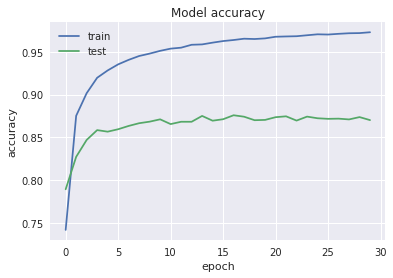

In [22]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('bottlenech)features.eps', format='eps', dpi=1000)